In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('D:\ML assignments and practice\insurance.csv')

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.shape

(1338, 7)

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
import seaborn as sns

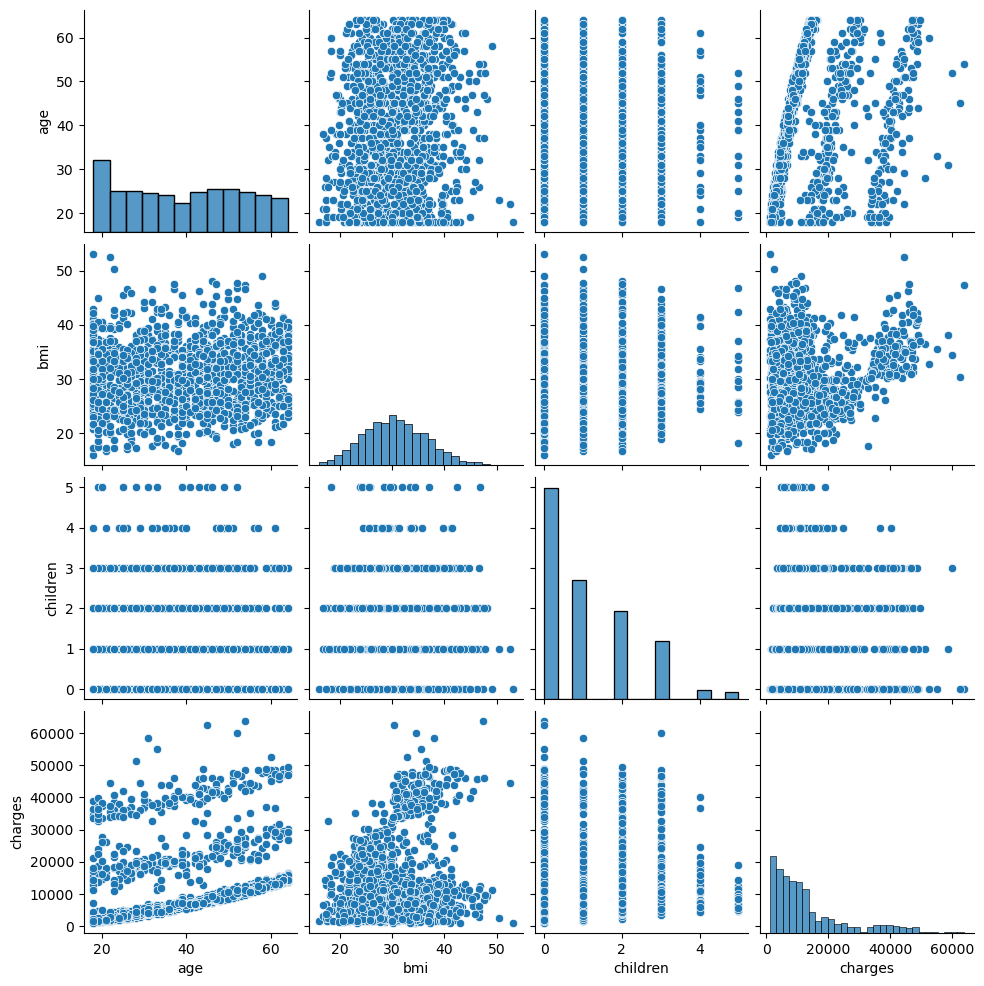

In [17]:
sns.pairplot(df)

In [18]:
df1 = df.replace(to_replace = ['male','female','yes','no'], value = [1,0,1,0]).drop('region',axis = 1)
df1

C:\Users\Avishkar\AppData\Local\Temp\ipykernel_16904\66246904.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df.replace(to_replace = ['male','female','yes','no'], value = [1,0,1,0]).drop('region',axis = 1)


,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


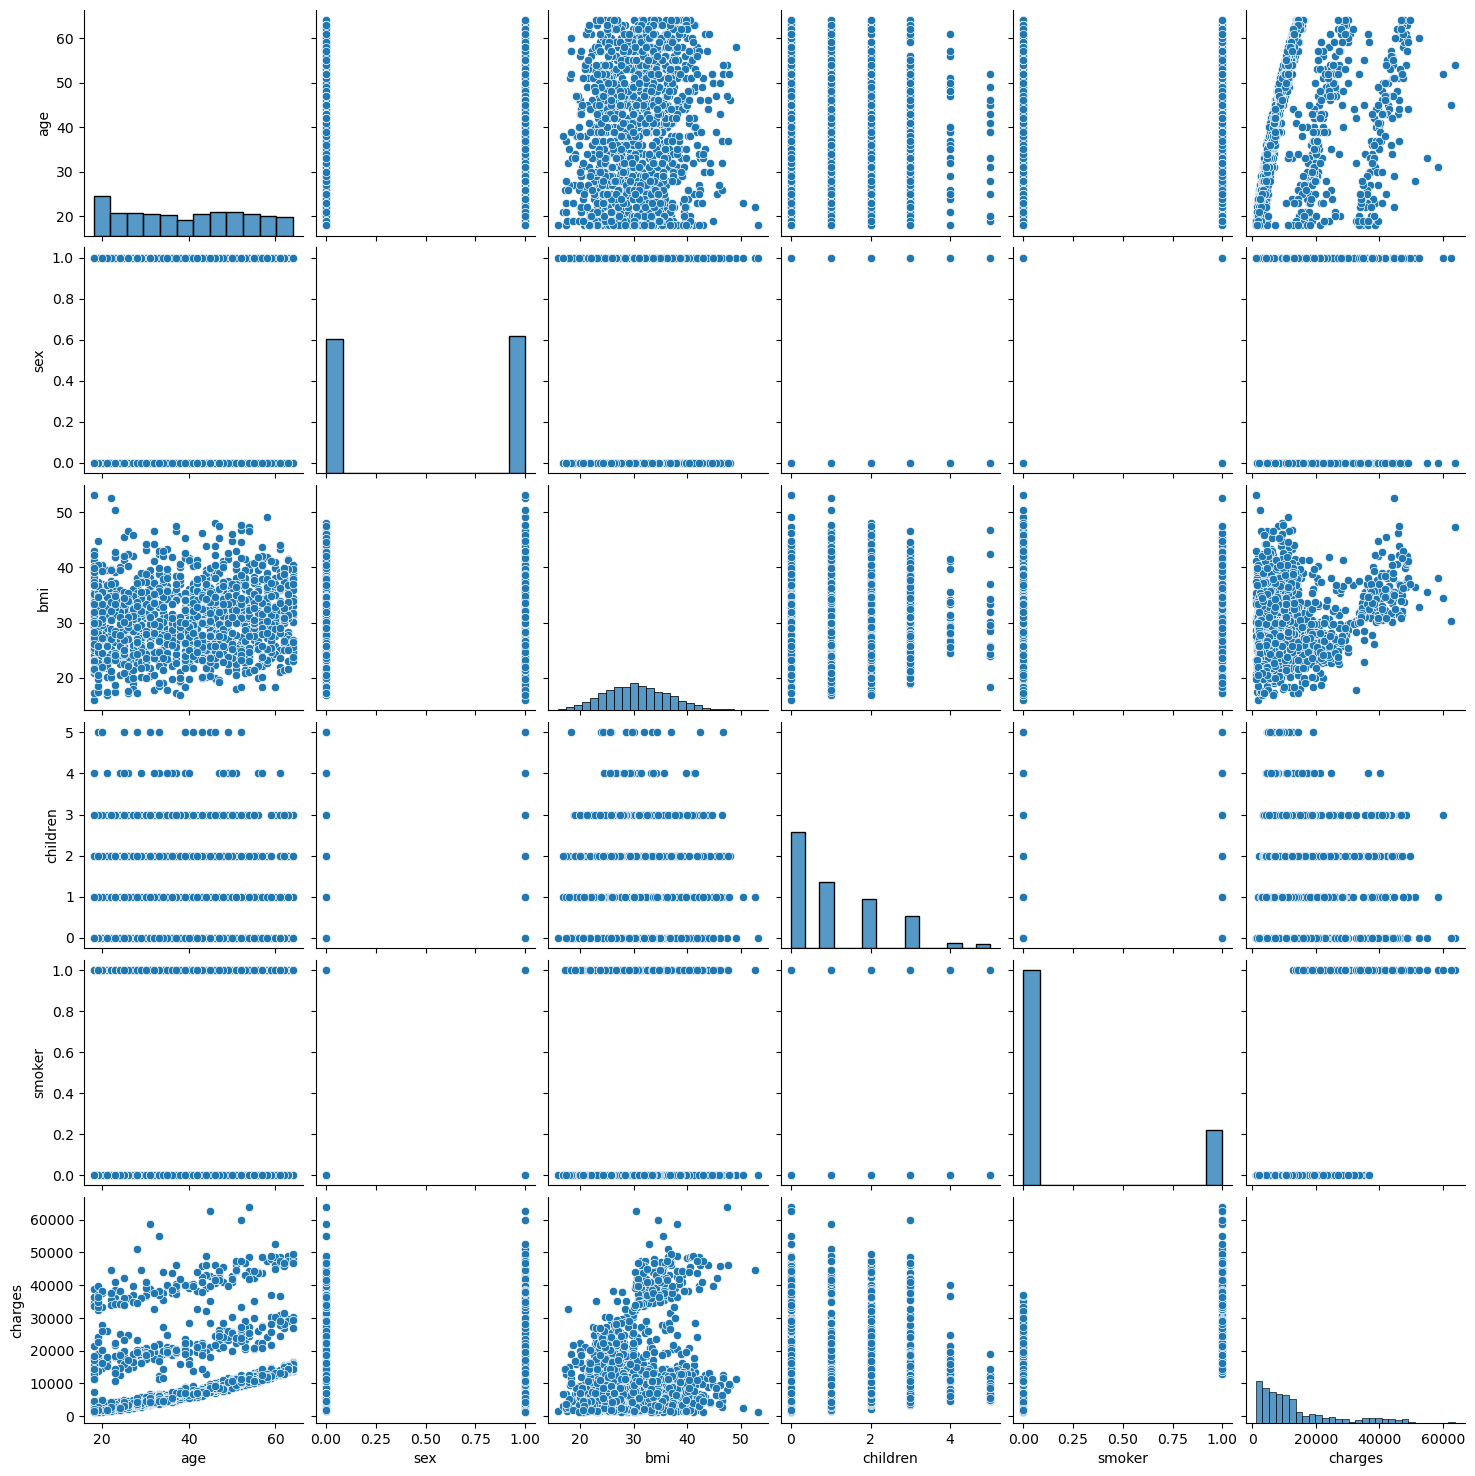

In [19]:
sns.pairplot(df1)

In [20]:
df1.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [21]:
## keeping age as the training set

In [22]:
age = np.array(df1['age'])
age

array([19, 18, 28, ..., 18, 21, 61])

In [23]:
y = np.array(df1['charges'])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [24]:
from sklearn.model_selection import train_test_split
age_train,age_test,y_train,y_test = train_test_split(age,y,train_size = 0.75)

In [25]:
reshaped_age_train = np.array(age_train.reshape(-1,1))

In [26]:
reshaped_y_train = np.array(y_train.reshape(-1,1))

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(reshaped_age_train,reshaped_y_train)

In [28]:
reg.coef_

array([[258.53548731]])

In [29]:
reg.intercept_

array([2810.1505667])

In [30]:
y_predict = reg.predict(reshaped_age_train)
y_predict

array([[13151.570059  ],
       [ 8239.39580016],
       [11600.35713516],
       ...,
       [15736.92493208],
       [15219.85395746],
       [ 7980.86031285]])

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# True values
y_true = y_test   # actual charges from test set

# Predicted values
y_pred = reg.predict(age_test.reshape(-1,1))   # predictions on test set

# Calculate errors
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 148458148.34781605
Mean Absolute Error (MAE): 9269.251496643254


In [ ]:
from sklearn.metrics import r2_score
r2_score(reshaped_y_train,y_predict)

In [ ]:
## keeping sex as the training set

In [171]:
sex = np.array(df1['sex'])
sex

array([0, 1, 1, ..., 0, 0, 0])

In [172]:
y = np.array(df1['charges'])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [173]:
from sklearn.model_selection import train_test_split
sex_train,sex_test,y_train,y_test = train_test_split(sex,y,train_size = 0.75)

In [174]:
reshaped_sex_train = np.array(sex_train.reshape(-1,1))
reshaped_y_train = np.array(y_train.reshape(-1,1))

In [175]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(reshaped_sex_train,reshaped_y_train)

In [176]:
reg1.coef_

array([[1648.71757482]])

In [177]:
reg1.intercept_

array([12197.89638298])

In [178]:
y_predict = reg1.predict(reshaped_sex_train)
y_predict

array([[12197.89638298],
       [12197.89638298],
       [13846.6139578 ],
       ...,
       [13846.6139578 ],
       [12197.89638298],
       [13846.6139578 ]])

In [179]:
from sklearn.metrics import r2_score
r2_score(reshaped_y_train,y_predict)

0.0048035692443466615

In [180]:
## keeping bmi as the training set

In [181]:
bmi = np.array(df1['bmi'])
bmi

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])

In [182]:
y = np.array(df1['charges'])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [183]:
from sklearn.model_selection import train_test_split
bmi_train,bmi_test,y_train,y_test = train_test_split(bmi,y,train_size = 0.75)

In [184]:
reshaped_bmi_train = np.array(bmi_train.reshape(-1,1))
reshaped_y_train = np.array(y_train.reshape(-1,1))

In [185]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression().fit(reshaped_bmi_train,reshaped_y_train)

In [186]:
reg2.coef_

array([[358.81831974]])

In [187]:
reg2.intercept_

array([1968.15335468])

In [188]:
y_predict = reg2.predict(reshaped_bmi_train)
y_predict

array([[14777.96736941],
       [14085.44801231],
       [14001.12570717],
       ...,
       [14171.56440905],
       [12373.88462715],
       [11853.59806353]])

In [189]:
from sklearn.metrics import r2_score
r2_score(reshaped_y_train,y_predict)

0.03390244560527722

In [200]:
#keeping children as the training set

In [221]:
children = np.array(df1['children'])
children

array([0, 1, 3, ..., 0, 0, 0])

In [222]:
y = np.array(df1['charges'])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [223]:
from sklearn.model_selection import train_test_split
children_train,children_test,y_train,y_test = train_test_split(children,y,train_size = 0.75)

In [224]:
reshaped_children_train = np.array(children_train.reshape(-1,1))
reshaped_y_train = np.array(y_train.reshape(-1,1))

In [226]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression().fit(reshaped_children_train,reshaped_y_train)

In [227]:
reg3.coef_

array([[394.523163]])

In [229]:
reg3.intercept_

array([12583.08211578])

In [230]:
y_predict = reg3.predict(reshaped_children_train)
y_predict

array([[12583.08211578],
       [12583.08211578],
       [12583.08211578],
       ...,
       [12977.60527878],
       [13372.12844179],
       [12583.08211578]])

In [231]:
from sklearn.metrics import r2_score
r2_score(reshaped_y_train,y_predict)

0.0016048043254058841

In [190]:
#keeping smoker as the training set

In [232]:
smoker = np.array(df1['smoker'])
smoker

array([1, 0, 0, ..., 0, 0, 1])

In [233]:
y = np.array(df1['charges'])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [234]:
from sklearn.model_selection import train_test_split
smoker_train,smoker_test,y_train,y_test = train_test_split(smoker,y,train_size = 0.75)

In [235]:
reshaped_smoker_train = np.array(smoker_train.reshape(-1,1))
reshaped_y_train = np.array(y_train.reshape(-1,1))

In [236]:
from sklearn.linear_model import LinearRegression
reg4 = LinearRegression().fit(reshaped_smoker_train,reshaped_y_train)

In [237]:
reg4.coef_

array([[22974.64504175]])

In [238]:
reg4.intercept_

array([8243.18316411])

In [239]:
y_predict = reg4.predict(reshaped_smoker_train)
y_predict

array([[31217.82820586],
       [ 8243.18316411],
       [ 8243.18316411],
       ...,
       [31217.82820586],
       [31217.82820586],
       [31217.82820586]])

In [240]:
from sklearn.metrics import r2_score
r2_score(reshaped_y_train,y_predict)

0.6094037442392091

In [33]:
# keeping all the columns as training set

In [40]:
x = np.array(df1.drop('charges',axis=1))
x

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ]])

In [41]:
y = np.array(df1['charges'])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75)

In [46]:
from sklearn.linear_model import LinearRegression
reg5 = LinearRegression().fit(x_train,y_train)

In [47]:
reg5.coef_

array([  255.10648221,  -241.21285459,   302.26350823,   519.16208544,
       23383.33764532])

In [49]:
reg5.intercept_

np.float64(-11391.365390416604)

In [50]:
y_predict = reg5.predict(x_train)
y_predict

array([12950.47956572,  4312.03467957, 33376.3757747 , ...,
       10894.80630236, 26387.12369549,  7355.35422083])

In [51]:
from sklearn.metrics import r2_score
r2_score(y_train,y_predict)

0.7462755482973116